In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from jax import config
config.update("jax_enable_x64", True)

In [4]:
from opentn.transformations import create_kitaev_liouvillians, super2ortho, create_trotter_layers
from opentn.stiefel import gradient_stiefel_vec, riemannian_hessian_vec, retract_stiefel
from opentn.optimization import frobenius_norm, model_stiefel_local, get_kitaev_trotter_local_ansatz
from opentn.trust_region_rcopt import riemannian_trust_region_optimize


d, N, gamma = 2, 4, 1
Lvec, Lvec_odd, Lvec_even, Lnn = create_kitaev_liouvillians(N=N, d=d, gamma=gamma, pbc=True)

tau = 0.5
exp_Lvec_4, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec_4)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

xs_rank4 = [super2ortho(x.real, rank=4) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]

In [5]:
xs_rank4_opt, f_rank4_opt, radius_rank4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank4, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263228e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263228e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263228e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.866579378716822e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.4174538687802225e-05
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.163272286924188e-05
radius 0.000625
iteration: 6
c

In [10]:
xs_rank4_opt_2, f_rank4_opt_2, radius_rank4_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank4_opt[-1], save_x=False, niter=10, radius_init=radius_rank4_opt
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.6021440346776207e-05
radius 0.00125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.5070424941986494e-05
radius 0.0025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.135968906698574e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.135968906698574e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.0572408773121714e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.8867989198990007e-05
radius 0.0003125
iteration

In [12]:
xs_rank8 = [super2ortho(x.real, rank=8) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]

In [13]:
xs_rank8_opt, f_rank8_opt, radius_rank8_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank8, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.868477150004101e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.443782024654394e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.208503418646501e-05
radius 0.0025
iteration: 6
col

In [15]:
xs_rank8_opt_2, f_rank8_opt_2, radius_rank8_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank8_opt[-1], save_x=False, niter=10, radius_init=radius_rank8_opt
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.405495843580145e-05
radius 0.0003125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.405495843580145e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.182381928080683e-05
radius 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.103026418331026e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.03729481829891e-05
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.709448344661308e-05
radius 0.000625
iteration: 6
c

In [8]:
import numpy as np
f_rank2_opt = np.load("f_pauli_n4_tau05_rank2.npy")

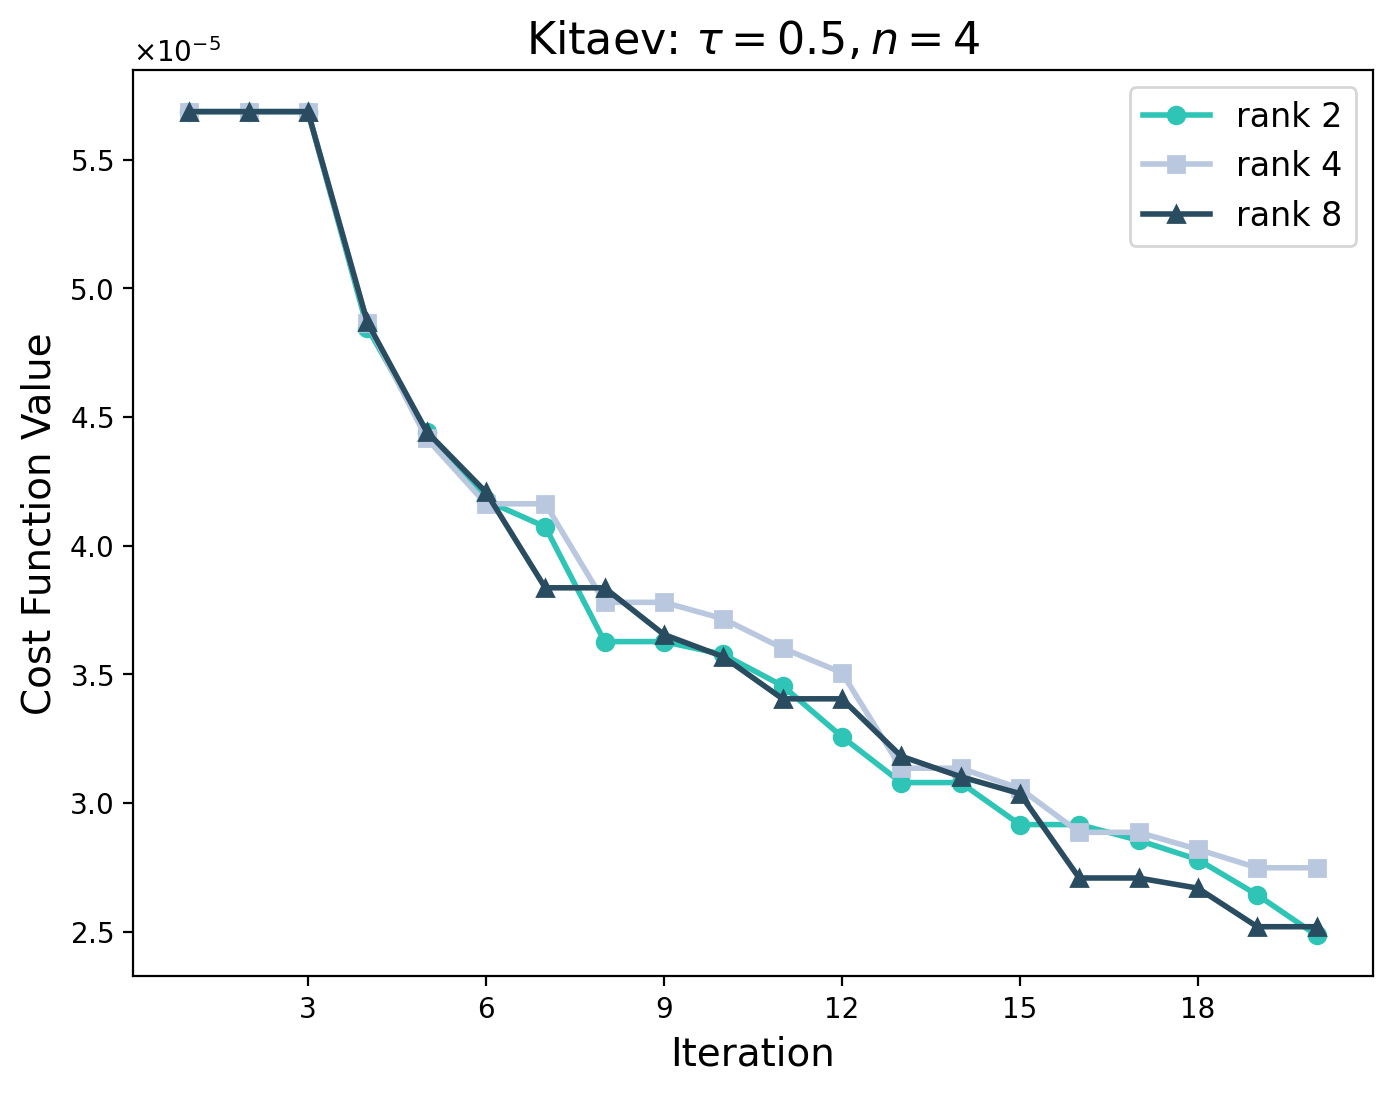

In [17]:
from opentn.utils import plot_pretty
f_kitaev_n4 = [f_rank2_opt, f_rank4_opt+f_rank4_opt_2, f_rank8_opt+f_rank8_opt_2]
labels = ["rank 2", "rank 4", "rank 8"]
title = r"Kitaev: $\tau = 0.5,  n = 4$"
fig = plot_pretty(f_kitaev_n4, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False)
fig.savefig('../images/thesis/cost_ranks_kitaev_n4.pdf')